In [233]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import mpld3
from mpld3 import plugins
from mpld3.utils import get_id
import urllib2
import nltk
from nltk.corpus import stopwords

import wordcloud

In [9]:
df = pd.read_csv("joined_jun25")

In [10]:
df['dt_date'] = pd.to_datetime(df['date'], format = '%B %d %Y')

In [11]:
df[df.artist == 'chance the rapper']

,album,area,artist,city,clean_genre,date,level,dt_date


In [12]:
def convert_riaa(row):
    if row >= 1:
        return(row * 1000000)

    if row == 0:    
        return(500000)


In [13]:
df.level = df.level.apply(convert_riaa)

In [14]:
df.reset_index(inplace=True,drop=True)

In [124]:
df

,album,area,artist,city,clean_genre,date,level,dt_date
0,HEAD GAMES,New York,foreigner,New York,u'rock' u'acoustic rock' u'aor' u'hard rock' u...,August 26 1985,5000000,1985-08-26
1,FLIRTIN' WITH DISASTER,Florida,molly hatchet,Jacksonville,u'hard rock' u'boogie rock' u'southern rock'],September 1 1979,2000000,1979-09-01
2,KENNY,no_area,kenny rogers,Australia,],September 29 1979,3000000,1979-09-29
3,HEARTACHE TONIGHT,California,eagles,Los Angeles,u'country rock' u'rock' u'folk rock' u'pop' u'...,November 8 1976,500000,1976-11-08
4,"NO MORE TEARS (ENOUGH IS ENOUGH) (7"")",Massachusetts,barbra streisand,Boston,u'disco' u'dance' u'dance-pop' u'electronic' u...,January 30 1979,1000000,1979-01-30
5,ROCK WITH YOU,Indiana,michael jackson,Gary,u'pop' u'dance-pop' u'american' u'contemporary...,October 10 1979,1000000,1979-10-10
6,WILLIE NELSON SINGS KRISTOFFERSON,Texas,willie nelson,Abbott,u'country' u'outlaw country' u'country pop' u'...,October 17 1979,1000000,1979-10-17
7,LIVE RUST,no_area,neil young,United States,],November 14 1979,1000000,1979-11-14
8,ELO'S GREATEST HITS,West Midlands,electric light orchestra,Birmingham,u'art rock' u'progressive rock' u'pop rock' u'...,January 30 1980,4000000,1980-01-30
9,PHOENIX,Illinois,dan fogelberg,Peoria,u'american' u'folk rock' u'pop' u'rock' u'deat...,January 30 1980,2000000,1980-01-30


In [16]:
rock_df = df[df["clean_genre"].str.contains("'rock'")]

In [17]:
hiphop_df = df[(df["clean_genre"].str.contains("'hip hop'"))|(df["clean_genre"].str.contains("'southern hip hop'"))|\
              (df["clean_genre"].str.contains("'rap'"))|(df["clean_genre"].str.contains("'dirty south'"))|\
              (df["clean_genre"].str.contains("'gangsta rap'"))|(df["clean_genre"].str.contains("'trap rap'"))\
              |(df["clean_genre"].str.contains("'mumble rapper'"))]

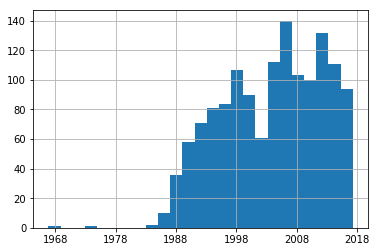

In [18]:
hiphop_df.dt_date.hist(bins=25)

In [19]:
hh_atlanta_df = hiphop_df[(hiphop_df["city"] == 'Atlanta')|(hiphop_df["city"] == 'East Point')\
                          |(hiphop_df["city"] == 'Decatur')|(hiphop_df["city"] == 'College Park')\
                         |(hiphop_df["city"] == 'Lawrenceville')|(hiphop_df["city"] == 'Stone Mountain')\
                         |(hiphop_df["city"] == 'Mableton')]

In [20]:
hh_detroit_df = hiphop_df[(hiphop_df["city"] == 'Detroit')|(hiphop_df["city"] == 'Romeo')]

In [106]:
hh_ny_df = hiphop_df[(hiphop_df["city"] == "New York")\
                    |(hiphop_df["city"] == "Brooklyn")|(hiphop_df["city"] == "The Bronx")\
                    |(hiphop_df["city"] == "Queens")|(hiphop_df["city"] == "South Bronx")]

In [107]:
hh_la_df = hiphop_df[(hiphop_df["city"] == "Compton")|(hiphop_df["city"] == "Long Beach")\
                     |(hiphop_df["city"] == "Los Angeles")|(hiphop_df["city"] == "Riverside")\
                    |(hiphop_df["area"] == "Los Angeles")|(hiphop_df["city"] == "South Gate")\
                    |(hiphop_df["city"] == "Hacienda Heights")|(hiphop_df["city"] == "Inglewood")]

In [125]:
hh_so_fl_df = hiphop_df[(hiphop_df["city"] == "Miami")|(hiphop_df["city"] == "Fort Myers")\
                     |(hiphop_df["city"] == "Miami Beach")]

In [108]:
hh_houston_df = hiphop_df[(hiphop_df["city"] == 'Houston')]

In [109]:
hh_no_df = hiphop_df[(hiphop_df["city"] == 'New Orleans')]

In [110]:
hh_chicago_df = hiphop_df[(hiphop_df["city"] == 'Chicago')]

In [160]:
hh_toronto_df = hiphop_df[(hiphop_df["city"] == 'Toronto')]

In [156]:
def mult_time_plot(dataframes, plot_legend, colors, filename):
    fig, ax = plt.subplots(figsize=(14,5))
    for dataframe, color in zip(dataframes, colors):

        total_medals = []
        dates = []
        start = pd.to_datetime('January 1 1981', format = '%B %d %Y')
        end = start
        while end < pd.to_datetime('March 4 2016', format = '%B %d %Y'):
            end = start + pd.DateOffset(years=1)

            year_df = dataframe[(dataframe['dt_date'] > (start - pd.DateOffset(years=1))) & (dataframe['dt_date'] < end)]
            total_medal = sum(year_df.level)
            start = end
            total_medals.append(total_medal)
            dates.append(start)

        ax.plot(dates,total_medals,color,lw=3)
    ax.legend(plot_legend,loc='upper left',fontsize=14,frameon=False)    
    mpld3.save_html(fig, filename)


In [157]:
def time_plot(dataframe,filename):
    fig, ax = plt.subplots(figsize=(14,5))
    total_medals = []
    dates = []
    start = pd.to_datetime('January 1 1981', format = '%B %d %Y')
    while start < pd.to_datetime('January 1 2017', format = '%B %d %Y'):

        year_df = dataframe[(dataframe['dt_date'] > (start - pd.DateOffset(months=6))) & (dataframe['dt_date'] < (start + pd.DateOffset(months=6)))]
        total_medal = sum(year_df.level)
        total_medals.append(total_medal)
        dates.append(start)
        start += pd.DateOffset(months=3)

    ax.plot(dates,total_medals,'#dd654f',lw=3)
    mpld3.save_html(fig, filename)


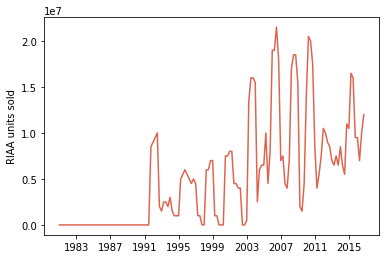

In [113]:
time_plot(hh_atlanta_df)

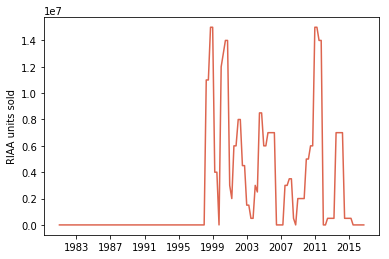

In [114]:
time_plot(hh_detroit_df)

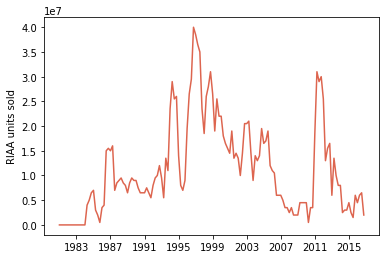

In [115]:
time_plot(hh_ny_df)

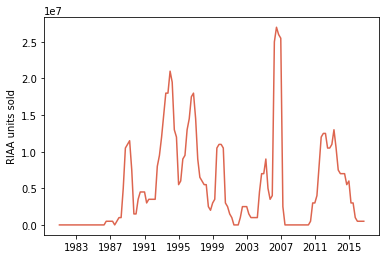

In [116]:
time_plot(hh_la_df)

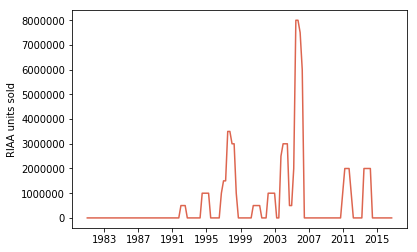

In [117]:
time_plot(hh_houston_df)

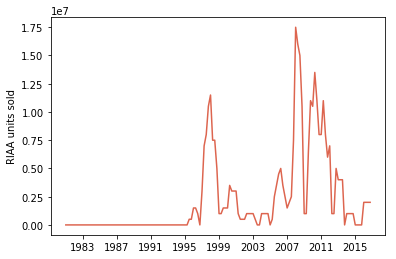

In [118]:
time_plot(hh_no_df)

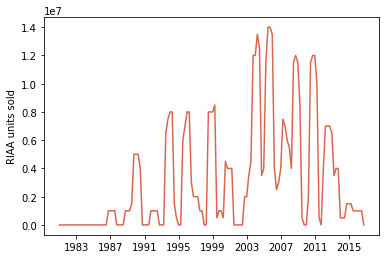

In [119]:
time_plot(hh_chicago_df)

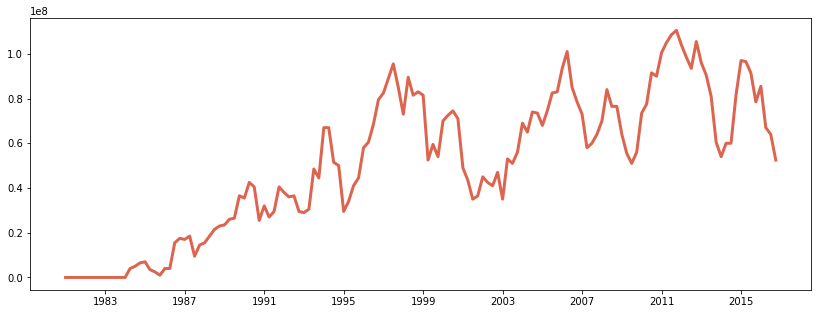

In [158]:
time_plot(hiphop_df,'all_rap_plot.html')

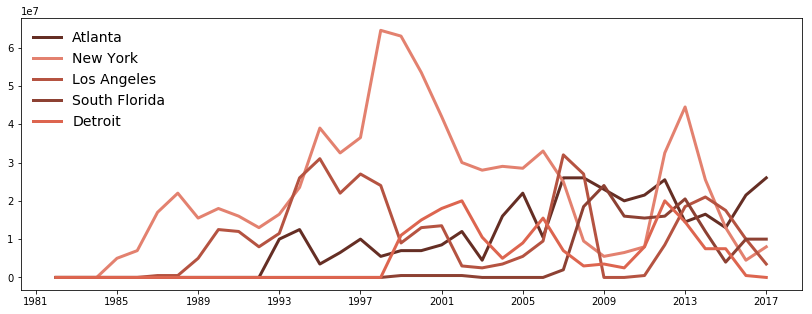

In [162]:
mult_time_plot([hh_atlanta_df,hh_ny_df,hh_la_df,hh_so_fl_df,hh_detroit_df], ("Atlanta","New York","Los Angeles", "South Florida", "Detroit"), ['#652E24','#E3816F','#B55341','#8D4133','#DD654F'], 'rap_mult_plot.html')

In [106]:
def time_plot_percent(dataframes, plot_legend):
    for dataframe in dataframes:
        total_medals = []
        dates = []
        start = pd.to_datetime('January 1 1981', format = '%B %d %Y')
        end = start
        while end < pd.to_datetime('March 4 2016', format = '%B %d %Y'):
            end = start + pd.DateOffset(years=1)

            year_df = dataframe[(dataframe['dt_date'] > (start - pd.DateOffset(years=1))) & (dataframe['dt_date'] < end)]
            total_medal = float(sum(year_df.level))
            allhh_year_df = hiphop_df[(hiphop_df['dt_date'] > (start - pd.DateOffset(years=1))) & (hiphop_df['dt_date'] < end)]

            allhh_medal = float(sum(allhh_year_df.level))
            if allhh_medal == 0.0:
                allhh_medal = 1.0
            percentage_city = total_medal/allhh_medal
            start = end
            total_medals.append(percentage_city)
            dates.append(start)

        plt.plot(dates,total_medals)
    plt.legend(plot_legend, loc = 'upper right')
    plt.show()


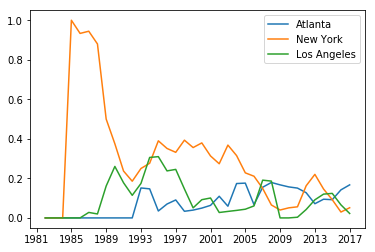

In [107]:
time_plot_percent([hh_atlanta_df,hh_ny_df,hh_la_df], ("Atlanta","New York","Los Angeles"))

In [206]:
import requests

CLIENT_ACCESS_TOKEN = "8w6t4TI13w4F0conyzyqJsICgpTMGBOBZTJiSpLskb_zxIt4Gqq4WEaL6YewIWvu"

BASE_URI = "https://api.genius.com"

def _get(search_phrase, params=None, headers=None):
    path = 'search?q=' + urllib2.quote(search_phrase)

    url = '/'.join([BASE_URI, path])

    token = "Bearer {}".format(CLIENT_ACCESS_TOKEN)

    if headers:
        headers['Authorization'] = token
    else:
        headers = {"Authorization": token}

    response = requests.get(url=url, params=params, headers=headers)
    response.raise_for_status()

    return response.json()

In [207]:
fix_artists = {}
fix_artists['2 pac'] = '2pac'
fix_artists['2-pac'] = '2pac'
fix_artists['b.o.b.'] = 'b.o.b'
fix_artists['beyone'] = 'beyonce'
fix_artists["bone thugs 'n harmony"] = 'bone thugs-n-harmony'
fix_artists['cee lo green'] = 'ceelo green'
fix_artists['diddy'] = 'puff daddy'
fix_artists['hammer'] = 'mc hammer'
fix_artists['l.l. cool j'] = 'll cool j'
fix_artists["lil' jon"] = 'lil jon'
fix_artists['michael franti'] = 'michael franti & spearhead'
fix_artists['mos def'] = 'yasiin bey'
fix_artists['n.w.a.'] = 'n.w.a'
fix_artists['notorious b.i.g.'] = 'the notorious b.i.g.'
fix_artists['p. diddy'] = 'puff daddy'
fix_artists['prodigy (of mobb deep)'] = 'prodigy of mobb deep'
fix_artists["salt 'n pepa"] = 'salt-n-pepa'
fix_artists['statler brothers'] = 'the statler brothers'
fix_artists['too short'] = 'too $hort'
fix_artists["tyler the creator"] = 'tyler, the creator'
fix_artists['u.g.k.'] = 'ugk'
fix_artists['young jeezy'] = 'jeezy'
fix_artists['young m.c.'] = 'young mc'

In [208]:
def genius_replace(row):
    if row.artist in fix_artists.keys():
        art = fix_artists[row.artist]
    else:
        art = row.artist
    return art

In [209]:
hiphop_df['artist'] = hiphop_df.apply(genius_replace, axis = 1)

/Users/samplank/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [210]:
artist_to_id = {}
artists = np.unique(hiphop_df.artist)
missed_artists = []

In [211]:
for artist in artists:
    art_response = _get(artist)
    ctr = 1
    found = False
    while ctr < 10:
        try:
            name_string = art_response['response']['hits'][ctr]['result']['primary_artist']['name']
            name_id = art_response['response']['hits'][ctr]['result']['primary_artist']['id']
            if name_string.lower() == artist:
                artist_to_id[artist] = name_id
                found = True
                ctr = 10
        except:
            ctr = 10
        ctr += 1
    if found == False:
        missed_artists.append(artist)

In [212]:
artist_to_id['beyonce'] = 498

In [213]:
hh_recent = hiphop_df[hiphop_df['dt_date'] > pd.to_datetime('January 1 2010', format = '%B %d %Y') ]
hh_00s = hiphop_df[(hiphop_df['dt_date'] > pd.to_datetime('January 1 2000', format = '%B %d %Y')) \
                    & (hiphop_df['dt_date'] < pd.to_datetime('January 1 2010', format = '%B %d %Y'))]
hh_90s = hiphop_df[(hiphop_df['dt_date'] > pd.to_datetime('January 1 1990', format = '%B %d %Y')) \
                    & (hiphop_df['dt_date'] < pd.to_datetime('January 1 2000', format = '%B %d %Y'))]
hh_80s = hiphop_df[(hiphop_df['dt_date'] > pd.to_datetime('January 1 1980', format = '%B %d %Y')) \
                    & (hiphop_df['dt_date'] < pd.to_datetime('January 1 1990', format = '%B %d %Y'))]

In [214]:
hh_2000s = hiphop_df[hiphop_df['dt_date'] > pd.to_datetime('January 1 2010', format = '%B %d %Y') ]

In [215]:
from bs4 import BeautifulSoup

In [216]:
def scrape_lyrics(url):
    try:
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')

        lyrics = soup.find(class_="lyrics")
        lyrics = lyrics.p
        for div in lyrics.find_all(class_='referent'):
            div.decompose()
        length = 2
        sum_string = ''
        content = lyrics.contents
        while len(content) > 1:
            sum_string += content[0].string + ' '
            try:
                content = content[-1].contents
            except:
                content = []
    except:
        sum_string = ''
        print(url)
        
    return sum_string


In [219]:
def getter(path, params=None, headers=None):

    url = '/'.join([BASE_URI, path])

    token = "Bearer {}".format(CLIENT_ACCESS_TOKEN)

    if headers:
        headers['Authorization'] = token
    else:
        headers = {"Authorization": token}

    response = requests.get(url=url, params=params, headers=headers)
    response.raise_for_status()

    return response.json()

def get_artist_songs(artist_id):

    current_page = 1
    next_page = True
    songs = []

    
    path = "artists/{}/songs?sort=popularity&per_page=25&page=1/".format(artist_id)
    params = {'page': current_page}
    data = getter(path=path, params=params)

    songs = data['response']['songs']

    return songs

In [220]:
def get_song_string(df):
    
    hiphop_songs = []
    
    for artist in np.unique(df.artist):
        try:
            artist_id = artist_to_id[artist]
            songs = get_artist_songs(artist_id)
            songs = [song for song in songs if song['primary_artist']['id'] == artist_id]
            hiphop_songs += songs
        except:
            pass
    
    recent_words = ''
    
    for song in hiphop_songs:
        url = song['url']
        lyrics = scrape_lyrics(url)
        recent_words += lyrics
        song['lyrics'] = lyrics
    
    return recent_words

In [221]:
atlanta_recentwords = get_song_string(hh_atlanta_df)

https://genius.com/Kris-kross-alright-lyrics


In [222]:
ny_recentwords = get_song_string(hh_ny_df)

https://genius.com/Black-sheep-effect-lyrics
https://genius.com/Black-sheep-me-and-my-brother-lyrics


In [223]:
la_recentwords = get_song_string(hh_la_df)

https://genius.com/Tone-loc-ace-in-the-house-lyrics
https://genius.com/Tone-loc-loced-after-dark-lyrics


In [224]:
chicago_recentwords = get_song_string(hh_chicago_df)

In [125]:
recent_words = get_song_string(hh_recent)
thousands_words = get_song_string(hh_00s)
nineties_words = get_song_string(hh_90s)
eighties_words = get_song_string(hh_80s)

https://genius.com/Mac-miller-100-grandkids-lyrics
https://genius.com/Macklemore-interview-with-rolling-stone-comments-on-race-and-success-annotated
https://genius.com/Tyler-the-creator-partyisntover-campfire-bimmer-lyrics
https://genius.com/A-tribe-called-quest-excursions-lyrics
https://genius.com/Aaliyah-come-back-in-one-piece-lyrics
https://genius.com/Blackstreet-yo-love-lyrics
https://genius.com/Canibus-master-thesis-lyrics
https://genius.com/Cyndi-lauper-hold-me-in-your-heart-lyrics
https://genius.com/De-la-soul-royalty-capes-lyrics
https://genius.com/Foxy-brown-come-fly-with-me-lyrics
https://genius.com/Fu-schnickens-watch-ya-back-door-lyrics
https://genius.com/Gang-starr-ex-girl-to-next-girl-lyrics
https://genius.com/Gang-starr-my-advice-2-you-lyrics
https://genius.com/Ice-cube-no-vaseline-lyrics
https://genius.com/Ice-t-og-original-gangster-lyrics
https://genius.com/Kenny-rogers-coward-of-the-county-lyrics
https://genius.com/Kenny-rogers-daytime-friends-lyrics
https://genius.co

In [225]:
stop_words = stopwords.words('english')

In [226]:
all_tokens = nltk.word_tokenize(atlanta_recentwords)
all_tokens = [token.lower() for token in all_tokens if token.lower() not in stop_words]
atlanta_fdist = nltk.FreqDist(all_tokens)

all_tokens = nltk.word_tokenize(ny_recentwords)
all_tokens = [token.lower() for token in all_tokens if token.lower() not in stop_words]
ny_fdist = nltk.FreqDist(all_tokens)

all_tokens = nltk.word_tokenize(la_recentwords)
all_tokens = [token.lower() for token in all_tokens if token.lower() not in stop_words]
la_fdist = nltk.FreqDist(all_tokens)

all_tokens = nltk.word_tokenize(chicago_recentwords)
all_tokens = [token.lower() for token in all_tokens if token.lower() not in stop_words]
chicago_fdist = nltk.FreqDist(all_tokens)

In [136]:
all_tokens = nltk.word_tokenize(recent_words)
all_tokens = [token.lower() for token in all_tokens if token.lower() not in stop_words]
recent_fdist = nltk.FreqDist(all_tokens)

all_tokens = nltk.word_tokenize(thousands_words)
all_tokens = [token.lower() for token in all_tokens if token.lower() not in stop_words]
thousands_fdist = nltk.FreqDist(all_tokens)

all_tokens = nltk.word_tokenize(nineties_words)
all_tokens = [token.lower() for token in all_tokens if token.lower() not in stop_words]
nineties_fdist = nltk.FreqDist(all_tokens)

all_tokens = nltk.word_tokenize(eighties_words)
all_tokens = [token.lower() for token in all_tokens if token.lower() not in stop_words]
eighties_fdist = nltk.FreqDist(all_tokens)

In [227]:
atlanta_words = [word for word,score in atlanta_fdist.most_common()[:250]]
ny_words = [word for word,score in ny_fdist.most_common()[:250]]
la_words = [word for word,score in la_fdist.most_common()[:250]]
chicago_words = [word for word,score in chicago_fdist.most_common()[:250]]

In [138]:
recent_words = [word for word,score in recent_fdist.most_common()[:100]]
thousands_words = [word for word,score in thousands_fdist.most_common()[:100]]
nineties_words = [word for word,score in nineties_fdist.most_common()[:100]]
eighties_words = [word for word,score in eighties_fdist.most_common()[:100]]

In [188]:
import sets

/Users/samplank/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: the sets module is deprecated
  if __name__ == '__main__':


In [228]:
atl_set = set(atlanta_words)
ny_set = set(ny_words)
la_set = set(la_words)
chi_set = set(chicago_words)

ny_la_chi = set(ny_words + la_words + chicago_words)
atl_la_chi = set(atlanta_words + la_words + chicago_words)
atl_ny_chi = set(ny_words + ny_words + chicago_words)
atl_ny_la = set(atlanta_words + ny_words + la_words)

In [141]:
recent_set = set(recent_words)
thousands_set = set(thousands_words)
nineties_set = set(nineties_words)
eighties_set = set(eighties_words)

tho_nin_eig = set(thousands_words + nineties_words + eighties_words)
rec_nin_eig = set(recent_words + nineties_words + eighties_words)
rec_tho_eig = set(recent_words + thousands_words + eighties_words)
rec_tho_nin = set(recent_words + thousands_words + nineties_words)

In [229]:
atl_set.difference(ny_la_chi)

{u'100',
 u'4',
 u'ain\u2019t',
 u'air',
 u'balling',
 u'broke',
 u'cake',
 u'charli',
 u'chick',
 u'coming',
 u'dab',
 u'dae',
 u'dat',
 u'dead',
 u'dis',
 u'drip',
 u'flocka',
 u'freak',
 u'fucking',
 u'gang',
 u'getting',
 u'gucci',
 u'homie',
 u'issa',
 u'jump',
 u'keri',
 u'lay',
 u'lives',
 u'lloyd',
 u'lose',
 u'mac',
 u'mad',
 u'matter',
 u'peek-a-boo',
 u'pow',
 u'pretty',
 u'pull',
 u'quavo',
 u'rain',
 u'revolution',
 u'rich',
 u'shawty',
 u'skrrt',
 u'smoke',
 u'spend',
 u'swag',
 u'taking',
 u'talking',
 u'trap',
 u'tryna',
 u'u',
 u'weed',
 u'yachty'}

In [230]:
ny_set.difference(atl_la_chi)

{u'comes',
 u'dee',
 u'deep',
 u'em',
 u'enough',
 u'flow',
 u'funky',
 u'gets',
 u'high',
 u'inside',
 u'it\u2019s',
 u'kick',
 u'kill',
 u'king',
 u'knew',
 u'kool',
 u'listen',
 u'mc',
 u'mic',
 u'mouth',
 u'next',
 u'nice',
 u'old',
 u'pain',
 u'place',
 u'prince',
 u'rap',
 u'rhyme',
 u'rhymes',
 u'saying',
 u'serch',
 u'shake',
 u'side',
 u'soul',
 u'sound',
 u'style',
 u'three',
 u'whoa',
 u'whodini',
 u'wild',
 u'yes'}

In [231]:
la_set.difference(atl_ny_chi)

{u'add',
 u'b-real',
 u'bang',
 u'becky',
 u'bitches',
 u'bomb',
 u'bossin',
 u'dick',
 u'diddy',
 u'dogg',
 u'eat',
 u'else',
 u'faded',
 u'fergie',
 u'fool',
 u'fresh',
 u'g',
 u'girls',
 u'goin',
 u'ha',
 u'hell',
 u'hoochie',
 u'ice',
 u'ink',
 u'la',
 u'living',
 u'london',
 u'lot',
 u'loving',
 u'luke',
 u'mama',
 u'marquis',
 u'motherfucker',
 u'pop',
 u'pre-chorus',
 u'pussy',
 u'rat',
 u'remember',
 u'roll',
 u'sayin',
 u'self',
 u'shakin',
 u'shinoda',
 u'slide',
 u'snoop',
 u'somebody',
 u'song',
 u'stand',
 u'suck',
 u'times',
 u'took',
 u'used',
 u'woman',
 u'young'}

In [232]:
chi_set.difference(atl_ny_la)

{u'2x',
 u'ah',
 u'aight',
 u'bell',
 u'bend',
 u'biv',
 u'bump',
 u'city',
 u'dance',
 u'devoe',
 u'dj',
 u'durk',
 u'eastside',
 u'end',
 u'floor',
 u'freaky',
 u'fun',
 u'grind',
 u'hoe',
 u'hurt',
 u'hush',
 u'incredible',
 u'injection',
 u'jiggy',
 u'kanye',
 u'kinda',
 u'kush',
 u'ladies',
 u'learn',
 u'lookin',
 u'looking',
 u'loud',
 u'low',
 u'makes',
 u'meet',
 u'miss',
 u'mmm',
 u'montay',
 u'n',
 u'needed',
 u'northside',
 u'nowhere',
 u'oomp',
 u'oreo',
 u'poison',
 u'ricky',
 u'road',
 u'rollin',
 u'slow',
 u'smile',
 u'smokin',
 u'southside',
 u'sticky',
 u'strong',
 u'tight',
 u'unk',
 u'west',
 u'westside',
 u'wish'}

In [146]:
recent_set.difference(tho_nin_eig)

{u'bad',
 u'bitches',
 u'de',
 u'don\u2019t',
 u'i\u2019m',
 u'lil',
 u'ooh',
 u'outro',
 u'que',
 u'really',
 u'shaky'}

In [147]:
thousands_set.difference(rec_nin_eig)

{u'even', u'every', u'show', u'world'}

In [148]:
nineties_set.difference(rec_tho_eig)

{u'another', u'black', u'game', u'stop', u'us'}

In [149]:
eighties_set.difference(rec_tho_nin)

{u'beat',
 u'funky',
 u'hard',
 u'kid',
 u'mc',
 u'mic',
 u'mind',
 u'new',
 u'party',
 u'people',
 u'rhyme',
 u'rhymes',
 u'thing',
 u'two',
 u'well',
 u'wo'}

In [167]:
artist_total = {}

for artist in np.unique(hh_atlanta_df.artist):
    artist_df = hh_atlanta_df[hh_atlanta_df.artist == artist]
    total = artist_df.level.sum()
    artist_total[artist] = total

In [168]:
artist_total

{'2 chainz': 2000000,
 '21 savage': 3500000,
 'arrested development': 6000000,
 'b.o.b.': 12000000,
 'b.o.b. feat. hayley williams': 6000000,
 'cee lo green': 7000000,
 'charli xcx': 500000,
 'childish gambino': 4500000,
 'dae dae': 500000,
 'future': 15000000,
 'future feat pharrell': 500000,
 'future feat rihanna': 500000,
 'future feat. drake': 3000000,
 'future feat. kanye west': 500000,
 'gnarls barkley': 5000000,
 'gucci mane': 1500000,
 'jay z': 500000,
 'k camp': 2000000,
 'keri hilson': 1000000,
 'kris kross': 7000000,
 'lil yachty': 1000000,
 "lil' jon": 1500000,
 'lloyd': 1000000,
 'ludacris': 18500000,
 'migos': 2500000,
 'monica': 12500000,
 'outkast': 25000000,
 'rich homie quan': 5000000,
 'soulja boy': 3000000,
 'soundtrack': 1000000,
 't.i.': 21000000,
 't.i. feat. iggy azalea': 1000000,
 't.i. feat. justin timberlake': 2500000,
 't.i. feat. keri hilson': 500000,
 't.i. feat. rihanna': 1000000,
 'travis porter': 1000000,
 'waka flocka flame': 500000,
 'young jeezy': 10

In [169]:
sorted(artist_total.items(), key=lambda item: item[1], reverse = True)

[('outkast', 25000000),
 ('t.i.', 21000000),
 ('ludacris', 18500000),
 ('future', 15000000),
 ('monica', 12500000),
 ('b.o.b.', 12000000),
 ('young jeezy', 10500000),
 ('kris kross', 7000000),
 ('cee lo green', 7000000),
 ('arrested development', 6000000),
 ('b.o.b. feat. hayley williams', 6000000),
 ('rich homie quan', 5000000),
 ('gnarls barkley', 5000000),
 ('yung joc', 5000000),
 ('childish gambino', 4500000),
 ('21 savage', 3500000),
 ('future feat. drake', 3000000),
 ('soulja boy', 3000000),
 ('migos', 2500000),
 ('t.i. feat. justin timberlake', 2500000),
 ('k camp', 2000000),
 ('2 chainz', 2000000),
 ('gucci mane', 1500000),
 ("lil' jon", 1500000),
 ('lil yachty', 1000000),
 ('lloyd', 1000000),
 ('t.i. feat. iggy azalea', 1000000),
 ('keri hilson', 1000000),
 ('soundtrack', 1000000),
 ('t.i. feat. rihanna', 1000000),
 ('travis porter', 1000000),
 ('waka flocka flame', 500000),
 ('dae dae', 500000),
 ('jay z', 500000),
 ('future feat. kanye west', 500000),
 ('t.i. feat. keri hils

In [172]:
recent_artist_total = {}

for artist in np.unique(hh_atlanta_df[hh_atlanta_df.dt_date > pd.to_datetime('January 1 2015', format = '%B %d %Y')]):
    artist_df = hh_atlanta_df[(hh_atlanta_df.dt_date > pd.to_datetime('January 1 2010', format = '%B %d %Y')) & (hh_atlanta_df.artist == artist)]
    total = artist_df.level.sum()
    recent_artist_total[artist] = total

In [174]:
sorted(recent_artist_total.items(), key=lambda item: item[1], reverse = True)

[('future', 15000000),
 ('rich homie quan', 5000000),
 ('childish gambino', 4500000),
 ('21 savage', 3500000),
 ('future feat. drake', 3000000),
 ('migos', 2500000),
 ('k camp', 2000000),
 ('lil yachty', 1000000),
 ('lloyd', 500000),
 ('dae dae', 500000),
 ('future feat rihanna', 500000),
 ('charli xcx', 500000),
 ('future feat pharrell', 500000),
 ('February 7 2015', 0),
 ('March 4 2016', 0),
 ('  NO HEART', 0),
 ('  TRU', 0),
 ('  ONE NIGHT', 0),
 ('February 10 2015', 0),
 ('Stone Mountain', 0),
 ('  WICKED', 0),
 ('April 21 2015', 0),
 ('  COMFORTABLE', 0),
 ('February 6 2016', 0),
 ('Atlanta', 0),
 (1000000, 0),
 (Timestamp('2016-05-06 00:00:00'), 0),
 ('July 10 2015', 0),
 ('  WAT U MEAN (AYE AYE AYE)', 0),
 ('February 24 2017', 0),
 ('  X (FEAT. FUTURE)', 0),
 (Timestamp('2016-07-15 00:00:00'), 0),
 ('  DS2', 0),
 (Timestamp('2017-02-24 00:00:00'), 0),
 ("u'atlanta' u'hip hop' u'hip-hop' u'rap']", 0),
 (2000000, 0),
 ('  STICK TALK', 0),
 ('  WHERE YA AT', 0),
 ('November 18 2016

In [153]:
hh_atlanta_df[hh_atlanta_df.dt_date > pd.to_datetime('January 1 2015', format = '%B %d %Y')]

,album,area,artist,city,clean_genre,date,level,dt_date
8679,MOVE THAT DOPE,Georgia,future feat pharrell,Atlanta,u'hip hop' u'contemporary r&b'],February 7 2015,500000,2015-02-07
8680,F*CK UP SOME COMMAS,Georgia,future,Atlanta,u'hip hop' u'contemporary r&b'],March 3 2015,2000000,2015-03-03
8782,WHERE YA AT,Georgia,future feat. drake,Atlanta,u'hip hop' u'contemporary r&b'],July 16 2015,2000000,2015-07-16
8785,F*CK UP SOME COMMAS,Georgia,charli xcx,Atlanta,u'hip hop' u'contemporary r&b'],March 3 2015,500000,2015-03-03
8808,GHOST TOWN,no_area,rich homie quan,Atlanta,u'hip hop'],April 21 2015,2000000,2015-04-21
8851,DS2,Georgia,future,Atlanta,u'hip hop' u'contemporary r&b'],July 17 2015,1000000,2015-07-17
8853,COMFORTABLE,Georgia,k camp,Atlanta,u'hip hop'],June 9 2015,500000,2015-06-09
8899,STICK TALK,Georgia,future,Atlanta,u'hip hop' u'contemporary r&b'],July 17 2015,1000000,2015-07-17
8973,MARCH MADNESS,Georgia,future,Atlanta,u'hip hop' u'contemporary r&b'],March 24 2015,500000,2015-03-24
9076,WICKED,Georgia,future,Atlanta,u'hip hop' u'contemporary r&b'],April 13 2016,1000000,2016-04-13


In [154]:
hh_atlanta_df[hh_atlanta_df.artist == 'migos']

,album,area,artist,city,clean_genre,date,level,dt_date
8568,FIGHT NIGHT,Georgia,migos,Lawrenceville,'hip hop',December 15 2014,500000,2014-12-15
8748,VERSACE,Georgia,migos,Lawrenceville,'hip hop',July 9 2013,500000,2013-07-09
9354,T-SHIRT,Georgia,migos,Lawrenceville,'hip hop',January 13 2017,500000,2017-01-13
12611,BAD AND BOUJEE (FEAT. LIL UZI VERT),Georgia,migos,Lawrenceville,'hip hop',October 28 2016,1000000,2016-10-28


In [89]:
hiphop_df[(hiphop_df.dt_date > pd.to_datetime('January 1 1995', format = '%B %d %Y')) & \
         (hiphop_df.dt_date < pd.to_datetime('December 31 1999', format = '%B %d %Y'))]

,album,area,artist,city,clean_genre,date,level,dt_date
2569,KEEP THEIR HEADS RINGIN',California,dr. dre,Compton,u'hip hop' u'west coast hip hop' u'g-funk' u'g...,February 7 1995,500000,1995-02-07
2583,DON'T TAKE IT PERSONAL,Georgia,monica,Atlanta,u'pop' u'contemporary r&b' u'hip hop' u'americ...,April 7 1995,1000000,1995-04-07
2587,FRIDAY,Ohio,soundtrack,Cleveland,u'hip hop'],April 11 1995,2000000,1995-04-11
2591,IN A MAJOR WAY,California,e-40,Vallejo,u'hip hop' u'rap'],March 14 1995,1000000,1995-03-14
2594,RETURN TO THE 36 CHAMBERS,New York,ol' dirty bastard,Brooklyn,u'boom bap' u'east coast hip hop' u'hardcore h...,March 1 1995,500000,1995-03-01
2598,THE INFAMOUS,New York,mobb deep,Queensbridge,u'east coast hip hop' u'gangsta rap' u'hip hop...,April 25 1995,500000,1995-04-25
2605,I'LL BE THERE FOR YOU,New York,method man,Hempstead,u'american' u'east coast hip-hop' u'hardcore r...,April 25 1995,1000000,1995-04-25
2615,LET ME FLOW,New Jersey,naughty by nature,East Orange,u'hip hop' u'boom bap' u'conscious hip hop' u'...,June 23 1995,500000,1995-06-23
2621,ONE MORE CHANGE,New York,notorious b.i.g.,Clinton Hill,u'east coast hip hop' u'gangsta rap' u'hip hop...,June 2 1995,1000000,1995-06-02
2650,I GOT 5 ON IT,California,luniz,Oakland,u'hip hop'],May 23 1995,1000000,1995-05-23
